In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("../Simple-Liner-Regression/placement.csv")
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


<Axes: xlabel='cgpa', ylabel='package'>

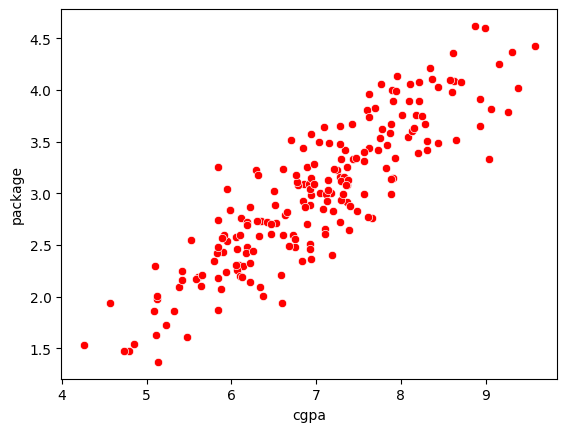

In [7]:
sns.scatterplot(data=df, x='cgpa', y='package', color='red')

In [8]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

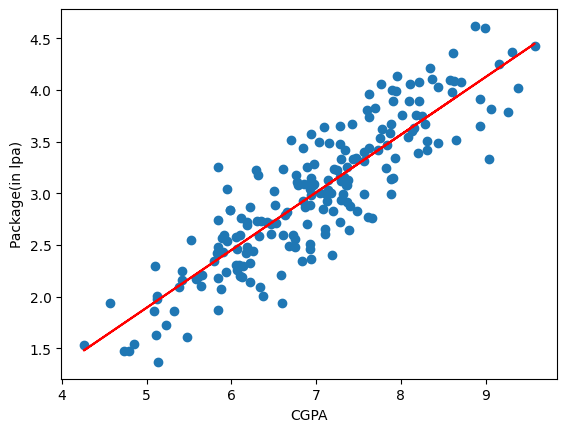

In [13]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

In [14]:
y_pred = lr.predict(X_test)

In [15]:
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [18]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [21]:
print("MAE", mean_absolute_error(y_test, y_pred))

MAE 0.2884710931878175


In [22]:
print("MSE", mean_squared_error(y_test, y_pred))

MSE 0.12129235313495527


In [23]:
print("RMSE", root_mean_squared_error(y_test, y_pred))

RMSE 0.34827051717731616


In [24]:
print("R2-Score", r2_score(y_test, y_pred))

R2-Score 0.780730147510384


## Adjusted r2 score

In [26]:
X_test.shape

(40, 1)

In [25]:
r2 = r2_score(y_test, y_pred)

1 - (((1 -r2)*(40-1))/(40-1-1))

0.7749598882343415

In [27]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.399712,3.26
1,5.12,0.001679,1.98
2,7.82,0.449130,3.25
3,7.42,0.357579,3.67
4,6.94,0.338541,3.57


Text(0, 0.5, 'Package(in lpa)')

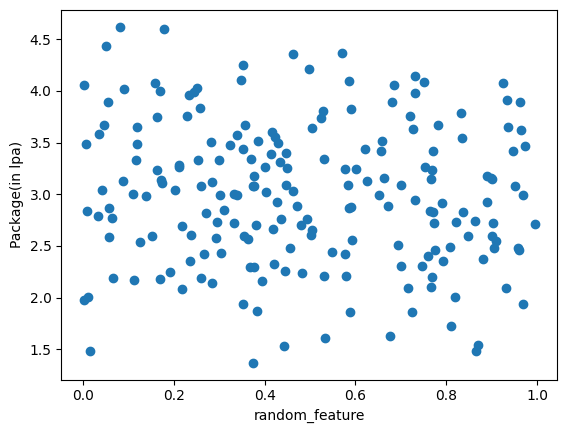

In [28]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [29]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [31]:
lr = LinearRegression()

In [32]:
lr.fit(X_train,y_train)

LinearRegression()

In [33]:
y_pred = lr.predict(X_test)

In [34]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7798148864414765


In [35]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.767912988411286

## Again create a new column which is useful one

In [36]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [37]:
df.sample(6)

,cgpa,package
179,7.14,3.03
115,8.35,4.21
6,6.73,2.60
87,8.09,3.55
118,7.40,2.88
125,7.33,3.16


Text(0, 0.5, 'Package(in lpa)')

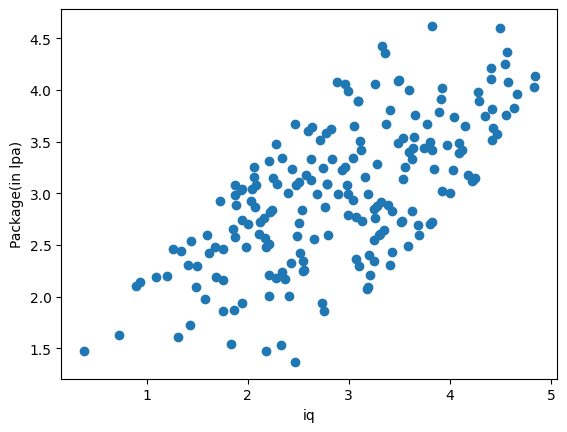

In [38]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [39]:
np.random.randint(-100,100)

51

In [40]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [42]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [43]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7859069427344685


In [44]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7743343450444398